# Visualizations of Sampling Times for dDDPM vs. DDPM
This notebook will compare the sampling times of the dDDPM and DDPM, in regards to number of samples and depth of the models.

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [41]:
# Sampling time (seconds) for a batch on 256x256 images
st_gd = 3726    # Guided Diffusion
st_fnm = 2848   # FengNiMa DDPM
st_x2 = 97      # dDDPM x2
st_x3 = 28      # dDDPM x3
st_x4 = 14      # dDDPM x4

# FID scores
fid_x2 = 20.73
fid_x3 = 42.49
fid_x4 = 82.93
fid_LSGM = 7.22

# error lines %
ERR = 0.15

In [75]:
sts = np.array([st_x2, st_x3, st_x4, st_fnm])
fids = np.array([fid_x2, fid_x3, fid_x4, fid_LSGM])
speedups = st_fnm / sts
print('x2\tx3    x4    sota')
print(fids)
print(sts)
print(speedups.round(1))
print((1 / (np.log(sts) * fids)).round(4))
print((speedups / fids).round(4))

x2	x3    x4    sota
[20.73 42.49 82.93  7.22]
[  97   28   14 2848]
[ 29.4 101.7 203.4   1. ]
[0.0105 0.0071 0.0046 0.0174]
[1.4163 2.3938 2.453  0.1385]


## Sample time vs. Number of batches

In [17]:
def add_interval_plot(ax, x, sample_time, factor:float=1., label:str='', err:float=0.1):
    time = sample_time * x * factor
    time_high = (sample_time * (1 + err)) * x * factor
    time_low = (sample_time * (1 - err)) * x * factor
    ax.plot(x, time, label=label)
    ax.fill_between(
        x, time_high, time_low,
        alpha=0.25, interpolate=True
    )

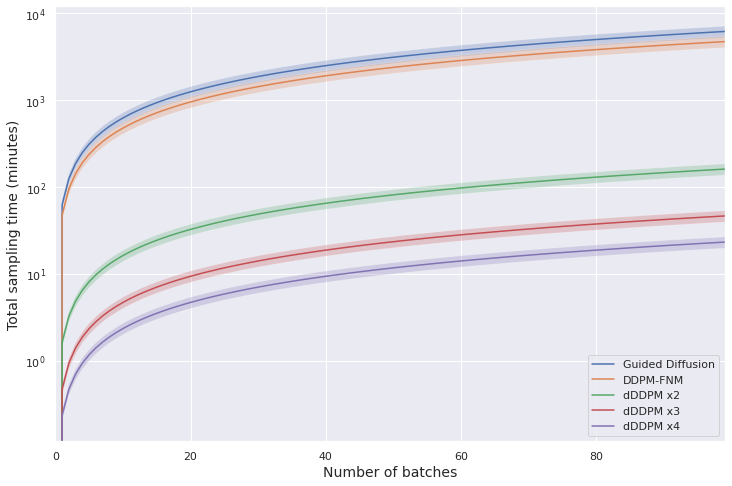

In [31]:
# Number of samples and depth of model
n_batches = np.arange(0, 100, 1)

# plot
f, ax = plt.subplots(1, 1, figsize=(12, 8))
add_interval_plot(ax, n_batches, st_gd, 1 / 60, 'Guided Diffusion', ERR)
add_interval_plot(ax, n_batches, st_fnm, 1 / 60, 'DDPM-FNM', ERR)
add_interval_plot(ax, n_batches, st_x2, 1 / 60, 'dDDPM x2', ERR)
add_interval_plot(ax, n_batches, st_x3, 1 / 60, 'dDDPM x3', ERR)
add_interval_plot(ax, n_batches, st_x4, 1 / 60, 'dDDPM x4', ERR)
ax.set_ylabel('Total sampling time (minutes)', fontsize=14)
ax.set_xlabel('Number of batches', fontsize=14)
ax.set_yscale('log')
ax.set_xlim([0, 99])
plt.legend(loc='best')
plt.savefig('../sampling_times_batches.png', bbox_inches='tight')
plt.show()

## Sampling time vs. FID
Sampling time of one batch vs. the calculated FID score

/zhome/d1/d/127408/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


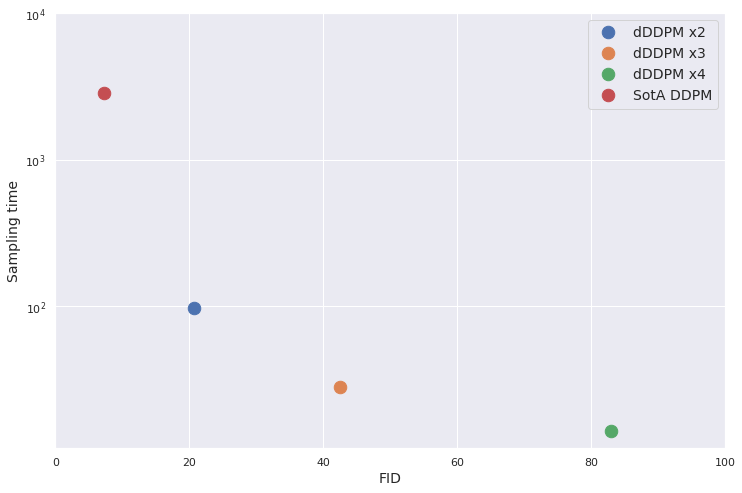

In [54]:
xs = [fid_x2, fid_x3, fid_x4, fid_LSGM]
ys = [st_x2, st_x3, st_x4, st_fnm]

# plot
plt.figure(figsize=(12, 8))
plt.plot(xs[0], ys[0], '.', markersize=25, label='dDDPM x2')
plt.plot(xs[1], ys[1], '.', markersize=25, label='dDDPM x3')
plt.plot(xs[2], ys[2], '.', markersize=25, label='dDDPM x4')
plt.plot(xs[3], ys[3], '.', markersize=25, label='SotA DDPM')
plt.yscale('log')
plt.ylabel('Sampling time', fontsize=14)
plt.xlabel('FID', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.xlim([0, 100])
plt.ylim([0, 10000])
plt.savefig('../sampling_times_fid_256.png', bbox_inches='tight')
plt.show()
# plt.legend(loc='best')
# plt.show()